In [1]:
#Real-Time Stock Price Prediction of RELIANCE, using Python

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader as pdr
from pandas_datareader import DataReader

from datetime import datetime

from __future__ import division

In [6]:
Rel = 'RELIANCE.NS'

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

Reliance = DataReader(Rel,'yahoo',start,end)
Reliance.describe()

,High,Low,Open,Close,Volume,Adj Close
count,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.000000
mean,1529.776852,1484.859435,1507.220940,1506.881188,1.551919e+07,1502.415066
std,276.174173,275.920956,276.508409,276.409181,1.063788e+07,277.588432
min,950.000000,875.650024,916.200012,884.049988,4.408336e+06,880.742920
25%,1364.949951,1321.000000,1352.000000,1342.849976,7.722577e+06,1337.826660
50%,1494.400024,1455.800049,1476.000000,1472.250000,1.270305e+07,1466.742676
75%,1590.000000,1557.800049,1573.000000,1575.849976,1.928241e+07,1569.955078
max,2198.800049,2150.649902,2178.800049,2177.699951,6.523004e+07,2177.699951


In [7]:
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2019-08-26 to 2020-08-24
Data columns (total 6 columns):
High         245 non-null float64
Low          245 non-null float64
Open         245 non-null float64
Close        245 non-null float64
Volume       245 non-null float64
Adj Close    245 non-null float64
dtypes: float64(6)
memory usage: 13.4 KB


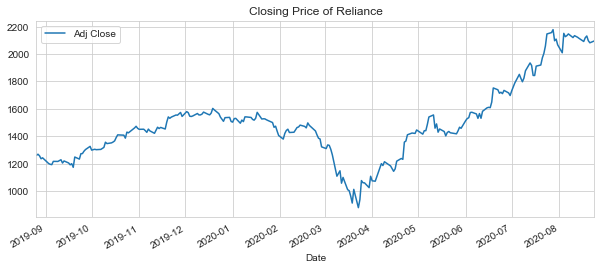

In [8]:
Reliance['Adj Close'].plot(title="Closing Price of Reliance",legend=True,figsize=(10,4))

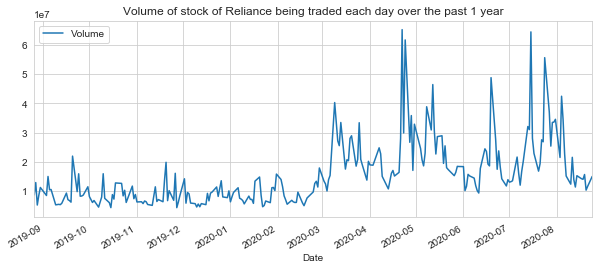

In [9]:
Reliance['Volume'].plot(title="Volume of stock of Reliance being traded each day over the past 1 year",legend=True,figsize=(10,4))

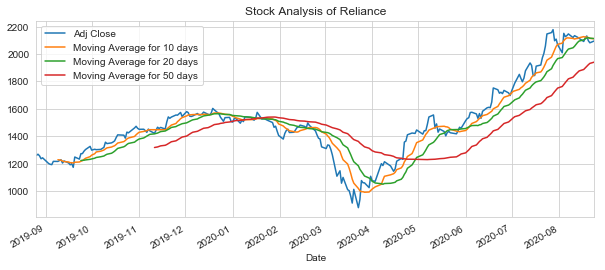

In [10]:
moving_average_days = [10,20,50]

for days in moving_average_days:
    column_name = "Moving Average for %s days" %(str(days))
    Reliance[column_name]=Reliance['Adj Close'].rolling(days).mean()

Reliance[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(title="Stock Analysis of Reliance",subplots=False,figsize=(10,4))

In [15]:
Reliance['Daily Return'] = Reliance['Adj Close'].pct_change()
Reliance['Daily Return'].head()

Date
2019-08-26         NaN
2019-08-27    0.006355
2019-08-28   -0.009060
2019-08-29   -0.017059
2019-08-30    0.005476
Name: Daily Return, dtype: float64

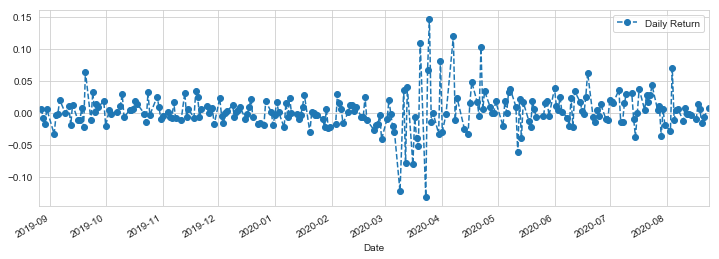

In [16]:
Reliance['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

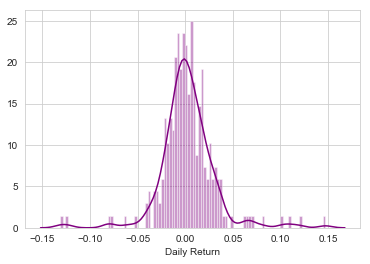

In [17]:
sns.distplot(Reliance['Daily Return'].dropna(),bins=100,color='purple')

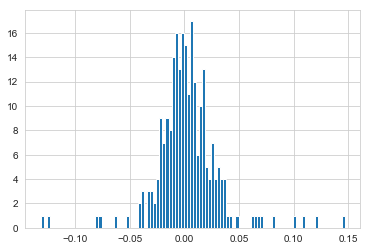

In [18]:
Reliance['Daily Return'].hist(bins=100)

('Expected Returns=', 0.002498145059273267, 'Expected Risk=', 0.02903819131438738)


Text(0.00249815,0.0290382,'Expected Return and Risk involved with it')

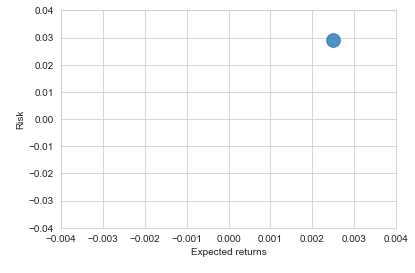

In [21]:
rets = Reliance['Daily Return'].dropna()

print("Expected Returns=", rets.mean(), "Expected Risk=", rets.std())
area = np.pi*60
plt.scatter(rets.mean(), rets.std(),alpha = 0.8,s =area)

plt.ylim([-0.04, 0.04])
plt.xlim([-0.004,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')
            
plt.annotate("Expected Return and Risk involved with it", xy=(1,1), xycoords='data', xytext=(rets.mean(), rets.std()), textcoords='offset points')

In [22]:
#Value At risk (Using Quantiles)
rets.quantile(0.05)

-0.03303948046373695

In [23]:
days = 365
dt = 1/days

mu = rets.mean()
sigma = rets.std()

In [24]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    #Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x])) 
    return price

Text(0.5,1,'Monte Carlo Analysis for Reliance')

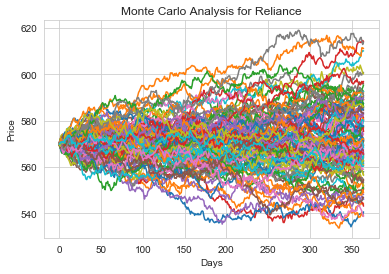

In [25]:
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Reliance')

In [26]:
runs = 10000

simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

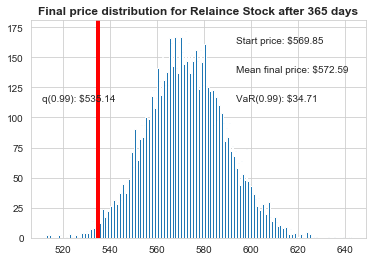

In [27]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Relaince Stock after %s days" % days, weight='bold');

In [28]:
print("THANK YOU")

THANK YOU
